<a href="https://colab.research.google.com/github/lukaszplust/data-science-learn/blob/main/131_140_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas

### Spis treści:
* [Import biblioteki](#0)
* [Ćwiczenie 131](#1)
* [Ćwiczenie 132](#2)
* [Ćwiczenie 133](#3)
* [Ćwiczenie 134](#4)
* [Ćwiczenie 135](#5)
* [Ćwiczenie 136](#6)
* [Ćwiczenie 137](#7)
* [Ćwiczenie 138](#8)
* [Ćwiczenie 139](#9)
* [Ćwiczenie 140](#10)

### <a name='0'></a>Import biblioteki

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

np.__version__
sns.set()

### <a name='1'></a> Ćwiczenie 131
Wczytaj plik csv do obiektu DataFrame o nazwie _df_raw_ z domyślnymi parametrami funkcji _pd.read_csv()_ i wyświetl 5 pierwszych wierszy.   
Adres url do pliku:
* https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/kaggle+/churn_modelling/Telco-Customer-Churn.csv


In [3]:
df_raw = pd.read_csv('https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/kaggle+/churn_modelling/Telco-Customer-Churn.csv')
df_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Skopiuj obiekt _df_raw_ do zmiennej _df_.

In [4]:
df = df_raw.copy()

Wyświetl podstawowe informacje na temat obiektu _df_.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Wyznacz liczbę brakujących elementów (_np.nan_) w obiekcie _df_ dla każdej zmiennej.

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### <a name='2'></a> Ćwiczenie 132
Zwróć uwagę na kolumnę _TotalCharges_. Typ tej kolumny to _object_. Spróbuj odgadnąć dlaczego tak się stało.

__Wskazówka:__
Spójrz na rozkład wartości zmiennej.

In [7]:
df['TotalCharges'].value_counts() #rozkład zmiennej

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

Zauważ, że na drugim miejscu mamy 11 wartości pustych. Aby lepiej to zobaczyć, patrz poniżej.

In [8]:
df['TotalCharges'].value_counts()[:3].index #wkradła się spacja dlatego cała kolumna ma typ object

Index([' ', '20.2', '19.75'], dtype='object')

Jest to znak spacji, który wkradł się w nasze dane. Spowodował, że pandas odczytał całą kolumnę jako tekst. Jako analityk musimy z takimi problemami sobie dawać radę. Spróbuj zamienić brakujące wartości kolumny _TotalCharges_ na jej medianę.

In [9]:
# Obliczenie mediany dla kolumny TotalCharges
Median = df['TotalCharges'][df['TotalCharges'] != ' '].median()

# Wypełnienie brakujących wartości medianą
df.loc[df['TotalCharges'] == ' ', 'TotalCharges'] = Median

# Konwersja kolumny TotalCharges do typu float
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [19]:
Median

1397.475

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Sprawdź, czy typ został poprawnie zmieniony.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### <a name='3'></a> Ćwiczenie 133
Kolumny z poniższej listy _categorical_ przekształć do typu _category_.

In [12]:
categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
               'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
               'StreamingTV', 'Contract', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Churn']

for cat in categorical:
  df[cat] = pd.Categorical(df[cat])
df[cat]  

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: category
Categories (2, object): ['No', 'Yes']

Kolumny z poniższej listy _numerical_ przekształć do typu _float_.

In [13]:
numerical = ['tenure', 'MonthlyCharges']

for num in numerical:
  df[num] = df[num].astype(float)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   float64 
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

Ustaw kolumnę _customerID_ jako indeks obiektu _df_ oraz wyświetl info o obiekcie _df_.

In [15]:
df = df.set_index('customerID')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   category
 2   Partner           7043 non-null   category
 3   Dependents        7043 non-null   category
 4   tenure            7043 non-null   float64 
 5   PhoneService      7043 non-null   category
 6   MultipleLines     7043 non-null   category
 7   InternetService   7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  PaperlessBilling  7043 non-null   category
 16  PaymentMethod 

### <a name='4'></a> Ćwiczenie 134
Użyj meteody _describe()_ do wyświetlenia podstawowych statystyk obiektu _df_.

In [16]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


Zauważ, że są to tylko zmienne numeryczne. Wyświetl podstawowe statystyki zmiennych kategorycznych przekazując odpowiedni parametr _include_ metody _describe()_.

In [17]:
df.describe(include=['category']) # zmienne kategoryczne !!!!!

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


Zauważ, że są to nieco inne statystyki niż dla zmiennych numerycznych.

### <a name='5'></a> Ćwiczenie 135 
Znajdź rozkład wartości zmiennej _Churn_.

In [18]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Zbuduj wykres kołowy rozkładu wartości zmiennej _Churn_.

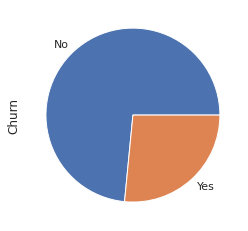

In [19]:
df['Churn'].value_counts().plot(kind='pie')

### <a name='6'></a> Ćwiczenie 136
Zbuduj wykres _pairplot()_ z biblioteki _seaborn_. Przekaż zmienne:
* tenure
* MonthlyCharges
* TotalCharges  


oraz parametr: _hue='Churn'_.

__Wskazówka:__
https://seaborn.pydata.org/generated/seaborn.pairplot.html


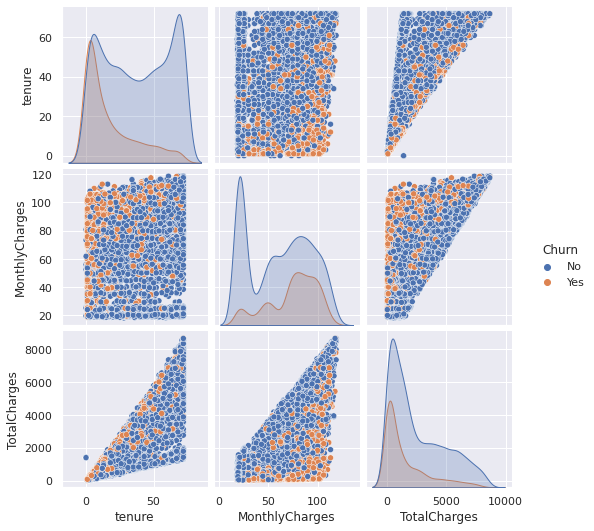

In [20]:
sns.pairplot(df, vars=['tenure', 'MonthlyCharges', 'TotalCharges'], hue='Churn')

### <a name='7'></a> Ćwiczenie 137
Dokonaj mapowania kolumny _Churn_ odpowiednio:
* 'Yes' -> 1
* 'No' -> 0

Wyświetl 5 pierwszych wierszy obiektu _df_.

In [21]:
df['Churn'].map({'Yes': 1, 'No': 0})

customerID
7590-VHVEG    0
5575-GNVDE    0
3668-QPYBK    1
7795-CFOCW    0
9237-HQITU    1
             ..
6840-RESVB    0
2234-XADUH    0
4801-JZAZL    0
8361-LTMKD    1
3186-AJIEK    0
Name: Churn, Length: 7043, dtype: category
Categories (2, int64): [0, 1]

### <a name='8'></a> Ćwiczenie 138
Wyznacz macierz korelacji dla obiektu _df_.

In [22]:
df.corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.825464
MonthlyCharges,0.247900,1.000000,0.650864
TotalCharges,0.825464,0.650864,1.000000


### <a name='9'></a> Ćwiczenie 139
Znajdź rozkład zmiennej _PaymentMethod_.

In [23]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

Pogrupuj dane po zmiennej _PaymentMethod_ i policz średnią wartość dla zmiennej _TotalCharges_.

In [24]:
df.groupby('PaymentMethod')['TotalCharges'].mean()

PaymentMethod
Bank transfer (automatic)    3077.121017
Credit card (automatic)      3070.296206
Electronic check             2090.868182
Mailed check                 1056.186104
Name: TotalCharges, dtype: float64

### <a name='10'></a> Ćwiczenie 140
Pobierz próbkę 10-ciu wierszy z obiektu _df_ i zapisz do pliku _sample_10.csv_.

In [25]:
df.sample(10).to_csv('sample_10.csv') #próbka to sample(amount)

Uruchom poniższą komórkę w celu sprawdzenia.

In [26]:
!cat sample_10.csv

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1600-DILPE,Female,0,No,No,12.0,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.0,524.35,No
7633-MVPUY,Male,0,Yes,No,57.0,Yes,No,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Electronic check,59.75,3450.15,No
0019-EFAEP,Female,0,No,No,72.0,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Two year,Yes,Bank transfer (automatic),101.3,7261.25,No
9554-DFKIC,Male,0,Yes,Yes,30.0,Yes,Yes,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),54.45,1588.7,No
1548-ARAGG,Female,0,Yes,Yes,4.0,Yes,Yes,DSL,No,Yes,No,Yes,No,No,Month-to-month,Yes,Mailed check,58.5,224.85,No
1963-VAUKV,Female,0,No,No,1.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No inter